Data Needed from nba_api:

Per-Player:
- General data: full name, number, team, and position
    - stats.endpoints.CommonPlayerInfo(PlayerID=...) (use static.players.get_players() to resolve IDs)
- Season per-game stats: PTS, AST, REB, STL, BLK, TO, FG% and FGA/FGM, FT% and FTM/FTA, 3P% and 3PM/3PA, GP, MPG
- Season per game advanced stats: PER, +/-, TS%, WS

How overall stats are calculated for each player:
- Scoring (SCO): Z(PTS_per_100)*0.4 + Z(TS%)*0.6 + Z(USG_PCT)*0.1  ->  accounts for volume, efficiency, and offensive load
- Playmaking (PLY): Z(AST_PCT)*0.5 + Z(AST_TO)*0.4 - Z(TO_PCT)*0.1  ->  accounts for chance creation, efficiency, and overall ball security
    consider adding good looks/chances created
- Rebounding (REB): Z(OREB_PCT)*0.6 + Z(DREB_PCT)*0.4  ->  accounts for amount of available offensive and defensive boards grabbed
    consider adding boxouts from hustlestats 
- Defending (DEF): Z(DBPM)*0.6 + Z(STL)*0.2 + Z(BLK)*0.2 - Z(PF)*0.1  ->  accounts for overall defensive impact, steals/blocks, and penalty for fouling
- Hustle (HST): Z(SCREEN_ASSISTS) + Z(DEFLECTIONS) + Z(LOOSE_BALLS_RECOVERED) + Z(CHARGES_DRAWN) + Z(CONTESTED_SHOTS)
- IMPACT (IMP): Z(PIE)*0.6 + Z(PLUS_MINUS)*0.4

How a player's overall position-aware ranking is calculated:
- 

Make sure to calculate overall stats and position-aware rankings efficiently


- Scoring (SCO): 
volume: fg, ft, 3p, pts
efficiency: efg, ts
variety: shots in paint, threes, 
- Playmaking (PLY): 
volume: AST, potential assists (good looks)
efficiency: AST/TOV

- Rebounding (REB): 
offensive, defensive, total rebounds
boxouts (from hustlestats)

- Defending (DEF): 
steals, blocks
defended fg% vs shooter avg fg%

- Hustle (HST):
deflections, loose balls recovered, charges drawn, screen assists

- IMPACT (IMP): 
PIE, plus minus


In [96]:
from nba_api.stats.endpoints import leaguedashplayerstats
import pandas as pd
pd.set_option('display.max_columns', None)
player_pergame_advanced_stats = leaguedashplayerstats.LeagueDashPlayerStats(season_type_all_star="Regular Season", per_mode_detailed="Per100Possessions", measure_type_detailed_defense="Advanced")
player_pergame_advanced_stats.get_data_frames()[0]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,TEAM_COUNT
0,1631260,AJ Green,AJ,1610612749,MIL,26.0,5,4,1,0.800,28.1,118.6,119.9,119.9,106.0,108.2,108.2,12.6,11.7,11.7,0.026,0.50,6.8,0.000,0.079,0.041,13.6,13.6,0.844,0.841,0.120,0.123,106.53,104.86,87.38,104.86,0.066,307,19,32,3.8,6.4,0.594,25,18,79,79,112,105,94,94,118,140,140,80,91,91,358,304,341,334,288,340,307,307,22,27,334,335,118,157,157,293,129,165,144,192,68,1
1,1642358,AJ Johnson,AJ,1610612764,WAS,20.0,3,0,3,0.000,3.2,108.9,122.2,122.2,130.4,127.8,127.8,-21.5,-5.6,-5.6,0.125,0.00,33.3,0.000,0.143,0.063,0.0,0.0,0.000,0.000,0.095,0.094,95.26,90.63,75.52,90.63,-0.024,18,0,2,0.0,0.7,0.000,284,348,300,348,397,252,67,67,391,382,382,372,251,251,194,329,28,334,146,271,1,1,388,395,378,384,392,412,412,403,388,374,388,391,388,1
2,203932,Aaron Gordon,Aaron,1610612743,DEN,30.0,4,3,1,0.750,29.8,116.3,116.8,116.8,98.5,99.6,99.6,17.8,17.2,17.2,0.115,1.50,12.9,0.008,0.162,0.089,8.6,8.5,0.702,0.768,0.213,0.221,101.46,100.69,83.91,100.69,0.180,250,27,47,6.8,11.8,0.574,170,57,79,86,95,136,128,128,56,59,59,53,57,57,217,185,273,322,115,164,163,166,57,43,109,110,284,301,301,24,72,110,52,93,79,1
3,1628988,Aaron Holiday,Aaron,1610612745,HOU,29.0,1,1,0,1.000,7.2,130.8,130.8,130.8,127.8,138.5,138.5,2.9,-7.7,-7.7,0.000,0.00,0.0,0.000,0.000,0.000,0.0,0.0,0.833,0.833,0.214,0.231,89.85,86.27,71.89,86.27,0.129,13,2,3,2.0,3.0,0.667,388,251,1,1,342,19,20,20,377,409,409,167,282,282,363,329,363,334,375,388,1,1,24,29,105,93,405,418,418,91,327,356,246,293,34,1
4,1630174,Aaron Nesmith,Aaron,1610612754,IND,26.0,4,0,4,0.000,32.5,103.1,105.4,105.4,106.8,109.4,109.4,-3.7,-4.0,-4.0,0.047,2.00,6.8,0.036,0.098,0.063,3.4,3.3,0.402,0.398,0.168,0.173,104.14,101.76,84.80,101.76,0.022,276,15,51,3.8,12.8,0.294,170,348,359,348,52,335,310,310,128,160,160,230,235,235,338,110,342,196,246,267,78,78,324,349,205,208,191,265,265,361,159,88,151,66,351,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1642258,Zaccharie Risacher,Zaccharie,1610612737,ATL,20.0,3,1,2,0.333,22.9,111.4,112.7,112.7,113.6,113.8,113.8,-2.1,-1.1,-1.1,0.000,0.00,0.0,0.025,0.045,0.034,3.6,3.6,0.460,0.486,0.156,0.156,111.15,110.37,91.97,110.37,0.034,157,10,25,3.3,8.3,0.400,284,251,157,280,179,207,190,190,235,230,230,215,208,208,363,329,363,257,354,359,80,80,281,303,233,244,23,39,39,344,217,202,171,150,268,1
420,203897,Zach LaVine,Zach,1610612758,SAC,30.0,5,1,4,0.200,36.6,105.8,107.5,107.5,118.5,119.2,119.2,-12.6,-11.7,-11.7,0.075,0.73,6.3,0.005,0.077,0.040,8.7,8.6,0.622,0.670,0.276,0.282,103.17,102.06,85.05,102.06,0.129,387,53,98,10.6,19.6,0.541,25,251,359,315,9,309,287,287,308,320,320,323,322,322,294,291,347,332,294,345,167,168,104,93,37,39,227,253,253,90,4,6,8,11,103,1
421,1630192,Zeke Nnaji,Zeke,1610612743,DEN,24.0,3,3,0,1.000,3.5,79.1,69.2,69.2,101.6,104.2,104.2,-22.5,-34.9,-34.9,0.200,1.00,14.3,0.091,0.000,0.040,14.3,14.5,0.500,0.615,0.207,0.228,108.08,114.10,95.09,114.10,0.

In [93]:
# fetch all necessary data
from nba_api.stats.endpoints import leaguedashplayerstats
player_pergame_advanced_stats = leaguedashplayerstats.LeagueDashPlayerStats(season_type_all_star="Regular Season", per_mode_detailed="PerGame", measure_type_detailed_defense="Advanced")
player_pergame_advanced_stats_df = player_pergame_advanced_stats.get_data_frames()[0][[
                                                             "PLAYER_ID", 
                                                             # Scoring
                                                             "TS_PCT", # shooting % that factors value of 3pt fgs, 2 pt fgs, and ft
                                                             "USG_PCT",
                                                             # Playmaking
                                                             "AST_TO", # assists/turnovers
                                                             "AST_PCT",
                                                             "TM_TOV_PCT",
                                                             # Rebounding
                                                             "OREB_PCT",
                                                             "DREB_PCT",
                                                             # Defending
                                                             # "STL_PCT",
                                                             # "BLK_PCT",
                                                             # Hustle
                                                             # Impact
                                                             # "PLUS_MINUS",
                                                             # "WS_48",
                                                             "PIE",
                                                             # Additional                                                           # Advanced stats for Player Rankings tab
                                                             "OFF_RATING",
                                                             "DEF_RATING", # num points per 100 possessions team allows while player is on court
                                                             "NET_RATING",
                                                             "EFG_PCT",
                                                             ]]

player_pergame_advanced_stats_df
# "['STL_PCT', 'BLK_PCT', 'PLUS_MINUS', 'WS_48'] is missing

player_per100_base_stats = leaguedashplayerstats.LeagueDashPlayerStats(season_type_all_star="Regular Season", per_mode_detailed="Per100Possessions", measure_type_detailed_defense="Base")
player_per100_base_stats_df = player_per100_base_stats.get_data_frames()[0][[
                                                             "PLAYER_ID", 
                                                             # Scoring
                                                             "PTS",
                                                             # Defending
                                                             "PF",
                                                             ]]

player_per100_base_stats_df

player_pergame_base_stats = leaguedashplayerstats.LeagueDashPlayerStats(season_type_all_star="Regular Season", per_mode_detailed="Per100Possessions", measure_type_detailed_defense="Base")
player_pergame_base_stats_df = player_pergame_base_stats.get_data_frames()[0][[
                                                             "PLAYER_ID", 
                                                             # Additional
                                                             "MIN",
                                                             "FGM", 
                                                             "FGA", 
                                                             "FG_PCT", 
                                                             "FG3M",
                                                             "FG3A",
                                                             "FG3_PCT",
                                                             "FTM",
                                                             "FTA",
                                                             "FT_PCT",
                                                             "OREB",
                                                             "DREB",
                                                             "REB",
                                                             "AST",
                                                             "TOV",
                                                             "STL",
                                                             "BLK",
                                                             "PTS",
                                                             "NBA_FANTASY_PTS",
                                                             # Impact
                                                             "PLUS_MINUS", # not sure if this is box plus/minus
                                                             ]]

player_pergame_base_stats_df

from nba_api.stats.endpoints import leaguedashptdefend
player_defense_stats = leaguedashptdefend.LeagueDashPtDefend(defense_category="Overall", season_type_all_star="Regular Season", per_mode_simple="PerGame")
player_defense_stats_df = player_defense_stats.get_data_frames()[0][[
                                                             "CLOSE_DEF_PERSON_ID", 
                                                             # Defending
                                                             "PCT_PLUSMINUS",
                                                             ]]
player_defense_stats_df

from nba_api.stats.endpoints import leaguehustlestatsplayer
player_hustle_stats = leaguehustlestatsplayer.LeagueHustleStatsPlayer(per_mode_time="Per36", season_type_all_star="Regular Season")
player_hustle_stats_df = player_hustle_stats.get_data_frames()[0][[
                                                             "PLAYER_ID", 
                                                             # Hustle
                                                             "SCREEN_ASSISTS",
                                                             "DEFLECTIONS",
                                                             "LOOSE_BALLS_RECOVERED",
                                                             "CHARGES_DRAWN",
                                                             "CONTESTED_SHOTS",
                                                             # Rebounding
                                                             "BOX_OUTS",
                                                             ]]
player_hustle_stats_df


player_per100_base_stats = leaguedashplayerstats.LeagueDashPlayerStats(season_type_all_star="Regular Season", per_mode_detailed="PerGame", measure_type_detailed_defense="Defense")
player_per100_base_stats.get_data_frames()[0]

# NOTE: PCT_STL, PCT_BLK, DEF_WS available in leaguedashplayerstats with measure_type_detailed_defense=Defense
# 

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,DEF_RATING,DREB,DREB_PCT,PCT_DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,DEF_WS_RAW,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,DEF_RATING_RANK,DREB_RANK,DREB_PCT_RANK,PCT_DREB_RANK,STL_RANK,PCT_STL_RANK,BLK_RANK,PCT_BLK_RANK,OPP_PTS_OFF_TOV_RANK,OPP_PTS_2ND_CHANCE_RANK,OPP_PTS_FB_RANK,OPP_PTS_PAINT_RANK,DEF_WS_RANK
0,1631260,AJ Green,AJ,1610612749,MIL,26.0,4,3,1,0.750,26.8,106.8,2.5,0.083,0.125,0.3,0.056,0.0,0.000,7.0,5.8,6.0,24.0,0.131,0.130508,135,46,79,88,130,132,179,277,293,291,308,244,244,185,190,202,260,63
1,1642358,AJ Johnson,AJ,1610612764,WAS,20.0,2,0,2,0.000,2.9,127.3,0.5,0.200,0.333,0.0,0.000,0.0,0.000,1.0,1.0,1.0,4.0,-0.002,-0.002439,330,347,175,347,399,378,340,44,36,322,322,244,244,20,37,36,38,356
2,203932,Aaron Gordon,Aaron,1610612743,DEN,30.0,4,3,1,0.750,29.8,99.6,5.3,0.162,0.219,0.8,0.150,0.3,0.125,7.5,6.5,5.8,27.5,0.204,0.203686,135,46,79,88,93,63,44,110,153,173,242,176,184,200,222,191,292,8
3,1628988,Aaron Holiday,Aaron,1610612745,HOU,29.0,1,1,0,1.000,7.2,138.5,0.0,0.000,0.000,0.0,0.000,0.0,0.000,1.0,10.0,0.0,6.0,-0.027,-0.026714,387,250,1,1,340,406,372,372,372,322,322,244,244,20,343,1,63,397
4,1630174,Aaron Nesmith,Aaron,1610612754,IND,26.0,4,0,4,0.000,32.5,109.4,3.3,0.098,0.140,0.0,0.000,0.5,0.154,10.5,8.8,7.8,37.0,0.131,0.130681,135,347,367,347,53,158,127,243,265,322,322,103,170,299,307,273,388,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1642258,Zaccharie Risacher,Zaccharie,1610612737,ATL,20.0,3,1,2,0.333,22.9,113.8,1.0,0.045,0.068,0.3,0.071,0.7,0.250,7.0,7.0,9.0,34.7,0.070,0.069781,275,250,175,279,179,225,297,350,351,281,300,84,107,185,235,316,371,170
418,203897,Zach LaVine,Zach,1610612758,SAC,30.0,5,1,4,0.200,36.6,119.2,2.8,0.077,0.131,0.4,0.054,0.2,0.063,17.8,11.4,10.8,46.0,0.048,0.048036,9,250,367,323,9,316,157,292,283,264,314,214,231,419,381,363,421,239
419,1630192,Zeke Nnaji,Zeke,1610612743,DEN,24.0,3,3,0,1.000,3.5,104.2,0.0,0.000,0.000,0.0,0.000,0.0,0.000,1.7,1.7,2.0,3.3,0.021,0.021151,275,46,1,1,390,98,372,372,372,322,322,244,244,46,52,60,35,308
420,1630533,Ziaire Williams,Ziaire,1610612751,BKN,24.0,3,0,3,0.000,18.5,116.0,1.0,0.061,0.097,1.3,0.333,0.0,0.000,9.0,4.0,7.7,22.0,0.044,0.044418,275,347,301,347,224,262,297,327,332,60,49,244,244,247,124,271,236,253


In [ ]:
# calculate ratings for each player: SCO, PLY, REB, DEF, HST, IMP
# NOTE: find solution for inflated stats from low-minute players: ignore players with MIN<300 season-to-date and multiply every z-score by w_i = MIN_i / (MIN_i + 600) (tune 600) to shrink low-minute outliers toward league average
# NOTE: compute z-scores on winsorized distributions (clip at +-2.5 SD)

# Scoring (SCO): Z(PTS_PER_100_POSS)*0.45 + Z(TS%)*0.45 + Z(USG_PCT)*0.1 

# Playmaking (PLY): Z(AST_PCT)*0.5 + Z(AST_TO)*0.2 + Z(POTENTIAL_AST_PER_100_POSS)*0.3

# Rebounding (REB): Z(DREB_PCT)*0.35 + Z(OREB_PCT)*0.55 + Z(BOX_OUTS_PER_36_MIN)*0.1

# Defending (DEF): Z(STL%)*0.15 + Z(BLK%)*0.15 - Z(PCT_PLUSMINUS (i.e., defended fg%))*0.6 - Z(PF_PER_100_POSS)*0.1
# NOTE: weigh steals and blocks differently (0.2 and 0.1 for guards, 0.15 and 0.15 for forwards, 0.1 and 0.2 for centers)

# Hustle (HST): 1/5[Z(SCREEN_ASSISTS_PER_36_MIN) + Z(DEFLECTIONS_PER_36_MIN) + Z(LOOSE_BALLS_RECOVERED_PER_36_MIN) + Z(CHARGES_DRAWN_PER_36_MIN) + Z(CONTESTED_SHOTS_PER_36_MIN)]
# NOTE: don't include screen assists for guards (also multiply by 1/4 instead)

# Impact (IMP): Z(PIE)*0.5 + Z(NET_RATING)*0.5

# NOTE: use per-36 for sparse events, per-100 for everything else (per-36 is good when opportunity is the main driver like for hustle stats, per-100 is good for volume stats like points, assists, rebounds, steals, blocks, and fouls)

# GUARDS: 


In [56]:
# fetch current season
from datetime import date
today = date.today()
start_year = today.year if today.month >= 10 else today.year - 1
season = f"{start_year}-{str(start_year + 1)[-2:]}"
print(season)

import pandas as pd
from nba_api.stats.endpoints import leaguedashplayerstats
pd.set_option('display.max_columns', None)
player_ppg_stats = leaguedashplayerstats.LeagueDashPlayerStats(season_type_all_star="Regular Season", per_mode_detailed="PerGame", measure_type_detailed_defense="Base")
player_ppg_stats_df = player_ppg_stats.get_data_frames()[0][["PLAYER_ID",
                                                             "PLAYER_NAME", 
                                                             "TEAM_ID", 
                                                             "GP", 
                                                             "MIN", 
                                                             # raw performance stats
                                                             "FGM", 
                                                             "FGA", 
                                                             "FG_PCT", 
                                                             "FG3M",
                                                             "FG3A",
                                                             "FG3_PCT",
                                                             "FTM",
                                                             "FTA",
                                                             "FT_PCT",
                                                             "OREB",
                                                             "DREB",
                                                             "REB",
                                                             "AST",
                                                             "TOV",
                                                             "STL",
                                                             "BLK",
                                                             "BLKA", # blocks against player (i.e., opponent blocked player's shot), or attempted blocks???
                                                             "PF", # personal fouls
                                                             "PFD", # personal fouls drawn
                                                             "PTS",
                                                             "PLUS_MINUS",
                                                             "NBA_FANTASY_PTS",
                                                            # ranked performance stats
                                                             "FGM_RANK", 
                                                             "FGA_RANK", 
                                                             "FG_PCT_RANK", 
                                                             "FG3M_RANK",
                                                             "FG3A_RANK",
                                                             "FG3_PCT_RANK",
                                                             "FTM_RANK",
                                                             "FTA_RANK",
                                                             "FT_PCT_RANK",
                                                             "OREB_RANK",
                                                             "DREB_RANK",
                                                             "REB_RANK",
                                                             "AST_RANK",
                                                             "TOV_RANK",
                                                             "STL_RANK",
                                                             "BLK_RANK",
                                                             "BLKA_RANK", # blocks against player (i.e., opponent blocked player's shot), or attempted blocks???
                                                             "PF_RANK", # personal fouls
                                                             "PFD_RANK", # personal fouls drawn
                                                             "PTS_RANK",
                                                             "PLUS_MINUS_RANK",
                                                             "NBA_FANTASY_PTS_RANK"
                                                             ]]
# res = player_ppg_stats_df.groupby('TEAM_ID').count()
# res
player_ppg_stats_df

# leaguestandings_output -> standings
# leaguedashteamstats -> team stats
# boxscoretraditionalv2_output, PlayerStats and TeamStats -> box scores

# leaguehustlestatsplayer, leaguehustlestatsteam -> hustle stats
# leaguedashplayerbiostats -> player age, height, weight, net rating, usage, true shooting, 
# leaguedashptstats -> team pace, distance, speed
# playergamelogoutput -> player stats per game
# playerindex -> player details (height, weight, position)


2025-26


,PLAYER_ID,PLAYER_NAME,TEAM_ID,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK
0,1631260,AJ Green,1610612749,4,26.8,4.0,6.3,0.640,3.3,5.5,0.591,1.0,1.3,0.800,0.0,2.5,2.5,0.8,1.3,0.3,0.0,0.0,3.3,1.5,12.3,8.3,15.9,136,190,50,13,69,25,183,220,156,319,183,236,276,161,280,233,246,60,181,120,39,215
1,1642358,AJ Johnson,1610612764,2,2.9,0.0,0.5,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,-1.0,1.4,377,380,377,289,342,289,310,315,310,319,334,355,298,348,313,233,246,345,341,384,210,386
2,203932,Aaron Gordon,1610612743,3,32.2,8.3,14.0,0.595,3.7,6.3,0.579,5.0,5.0,1.000,0.3,4.0,4.3,2.0,1.3,1.0,0.3,0.3,1.3,4.3,25.3,8.0,36.2,26,53,68,9,48,27,31,47,1,276,90,134,148,153,90,154,169,264,42,21,42,43
3,1628988,Aaron Holiday,1610612745,1,7.2,2.0,3.0,0.667,1.0,2.0,0.500,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,-1.0,5.0,240,290,38,163,230,43,310,315,310,319,365,375,347,348,313,233,246,369,341,259,210,338
4,1630174,Aaron Nesmith,1610612754,3,31.1,4.3,11.7,0.371,3.3,7.0,0.476,0.7,1.7,0.400,1.3,4.0,5.3,1.0,0.3,0.0,0.3,1.0,3.0,3.0,12.7,-2.3,21.2,126,89,293,12,28,65,243,177,297,106,90,97,235,314,313,154,24,68,78,114,259,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,1642258,Zaccharie Risacher,1610612737,3,22.9,3.3,8.3,0.400,1.0,3.3,0.300,1.0,1.3,0.750,0.7,1.0,1.7,0.0,0.3,0.3,0.7,0.3,1.3,0.7,8.7,-1.3,13.3,165,146,258,163,161,203,183,204,187,206,289,289,347,314,271,80,169,264,275,180,231,248
415,203897,Zach LaVine,1610612758,5,36.6,10.6,19.6,0.541,3.2,8.4,0.381,4.8,5.0,0.960,0.2,2.8,3.0,1.6,2.2,0.4,0.2,0.6,1.8,3.8,29.2,-10.0,34.8,10,10,104,18,14,130,38,47,77,309,166,201,195,66,260,214,108,212,52,11,396,51
416,1630192,Zeke Nnaji,1610612743,2,2.2,0.0,0.5,0.000,0.0,0.5,0.000,1.0,1.0,1.000,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,1.0,1.0,-1.0,1.8,377,380,377,289,313,289,183,237,1,319,365,375,298,348,313,233,246,345,225,364,210,381
417,1630533,Ziaire Williams,1610612751,3,18.5,3.3,6.7,0.500,2.3,5.0,0.467,1.3,1.7,0.800,1.0,1.0,2.0,0.3,0.0,1.3,0.0,0.3,3.3,1.3,10.3,-2.3,17.2,165,182,142,52,87,70,163,177,156,131,289,258,324,348,52,233,169,55,199,148,259,195


In [64]:
player_ppg_stats = leaguedashplayerstats.LeagueDashPlayerStats(season_type_all_star="Regular Season", per_mode_detailed="PerGame", measure_type_detailed_defense="Advanced")
player_ppg_stats_df = player_ppg_stats.get_data_frames()[0][["PLAYER_ID", 
                                                             "PLAYER_NAME", 
                                                             "TEAM_ID", 
                                                             "TEAM_ABBREVIATION",
                                                             # raw performance stats
                                                             "OFF_RATING",
                                                             "DEF_RATING", # num points per 100 possessions team allows while player is on court
                                                             "NET_RATING",
                                                             "AST_TO", # assists/turnovers
                                                             "EFG_PCT", # fg % adjusted for 3pt fgs being 1.5x more valuable than 2pt fgs
                                                             "TS_PCT", # shooting % that factors value of 3pt fgs, 2 pt fgs, and ft
                                                             "USG_PCT",
                                                             "PACE", # num possessions per 48 min
                                                             "PIE", # player impact estimate
                                                            # ranked performance stats
                                                             "OFF_RATING_RANK",
                                                             "DEF_RATING_RANK", # num points per 100 possessions team allows while player is on court
                                                             "NET_RATING_RANK",
                                                             "AST_TO_RANK", # assists/turnovers
                                                             "EFG_PCT_RANK", # fg % adjusted for 3pt fgs being 1.5x more valuable than 2pt fgs
                                                             "TS_PCT_RANK", # shooting % that factors value of 3pt fgs, 2 pt fgs, and ft
                                                             "USG_PCT_RANK",
                                                             "PACE_RANK", # num possessions per 48 min
                                                             "PIE_RANK" # player impact estimate
                                                             ]]
# res = player_ppg_stats_df.groupby('TEAM_ID').count()
# res
# player_ppg_stats_df
player_ppg_stats.get_data_frames()[0]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,TEAM_COUNT
0,1631260,AJ Green,AJ,1610612749,MIL,26.0,4,3,1,0.750,26.8,121.0,120.9,120.9,105.7,106.8,106.8,15.2,14.1,14.1,0.035,0.60,8.6,0.000,0.083,0.044,14.3,14.2,0.900,0.901,0.124,0.127,105.18,104.63,87.19,104.63,0.077,234,16,25,4.0,6.3,0.640,125,46,79,88,129,81,81,81,116,131,131,63,71,71,342,295,321,327,275,327,315,315,19,18,322,327,164,168,168,241,147,194,134,190,48,1
1,1642358,AJ Johnson,AJ,1610612764,WAS,20.0,2,0,2,0.000,2.9,102.0,109.1,109.1,119.0,127.3,127.3,-17.0,-18.2,-18.2,0.250,0.00,50.0,0.000,0.200,0.111,0.0,0.0,0.000,0.000,0.083,0.085,96.22,90.00,75.00,90.00,0.000,11,0,1,0.0,0.5,0.000,328,343,175,343,399,333,257,257,310,378,378,355,362,362,54,326,2,327,44,103,1,1,385,392,384,386,385,408,408,374,385,383,385,391,385,1
2,203932,Aaron Gordon,Aaron,1610612743,DEN,30.0,4,3,1,0.750,29.8,116.3,116.8,116.8,98.5,99.6,99.6,17.8,17.2,17.2,0.115,1.50,12.9,0.008,0.162,0.089,8.6,8.5,0.702,0.768,0.213,0.221,101.46,100.69,83.91,100.69,0.180,250,27,47,6.8,11.8,0.574,125,46,79,88,93,139,127,127,59,63,63,50,58,58,211,180,268,317,111,164,165,168,58,44,103,106,277,295,295,24,62,96,52,88,82,1
3,1628988,Aaron Holiday,Aaron,1610612745,HOU,29.0,1,1,0,1.000,7.2,130.8,130.8,130.8,127.8,138.5,138.5,2.9,-7.7,-7.7,0.000,0.00,0.0,0.000,0.000,0.000,0.0,0.0,0.833,0.833,0.214,0.231,89.85,86.27,71.89,86.27,0.129,13,2,3,2.0,3.0,0.667,386,241,1,1,340,20,21,21,375,406,406,165,275,275,357,326,357,327,372,384,1,1,26,30,99,91,403,414,414,87,323,352,244,292,36,1
4,1630174,Aaron Nesmith,Aaron,1610612754,IND,26.0,4,0,4,0.000,32.5,103.1,105.4,105.4,106.8,109.4,109.4,-3.7,-4.0,-4.0,0.047,2.00,6.8,0.036,0.098,0.063,3.4,3.3,0.402,0.398,0.168,0.173,104.14,101.76,84.80,101.76,0.022,276,15,51,3.8,12.8,0.294,125,343,366,343,53,326,308,308,128,157,157,229,238,238,332,113,335,196,244,261,76,76,320,347,205,207,193,261,261,358,151,79,147,67,349,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1642258,Zaccharie Risacher,Zaccharie,1610612737,ATL,20.0,3,1,2,0.333,22.9,111.4,112.7,112.7,113.6,113.8,113.8,-2.1,-1.1,-1.1,0.000,0.00,0.0,0.025,0.045,0.034,3.6,3.6,0.460,0.486,0.156,0.156,111.15,110.37,91.97,110.37,0.034,157,10,25,3.3,8.3,0.400,273,241,175,278,179,204,186,186,233,227,227,213,209,209,357,326,357,258,350,356,78,78,281,302,233,244,27,45,45,342,211,194,170,147,265,1
417,203897,Zach LaVine,Zach,1610612758,SAC,30.0,5,1,4,0.200,36.6,105.8,107.5,107.5,118.5,119.2,119.2,-12.6,-11.7,-11.7,0.075,0.73,6.3,0.005,0.077,0.040,8.7,8.6,0.622,0.670,0.276,0.282,103.17,102.06,85.05,102.06,0.129,387,53,98,10.6,19.6,0.541,1,241,366,311,9,304,282,282,304,317,317,321,321,321,291,286,339,325,289,340,170,170,107,93,38,38,225,251,251,85,3,4,8,11,105,1
418,1630192,Zeke Nnaji,Zeke,1610612743,DEN,24.0,3,3,0,1.000,3.5,79.1,69.2,69.2,101.6,104.2,104.2,-22.5,-34.9,-34.9,0.200,1.00,14.3,0.091,0.000,0.040,14.3,14.5,0.500,0.615,0.207,0.228,108.08,114.10,95.09,114.10,0.021

In [63]:
from nba_api.stats.endpoints import leaguedashptdefend

player_ppg_stats = leaguedashptdefend.LeagueDashPtDefend(season_type_all_star="Regular Season", per_mode_simple="PerGame")
player_ppg_stats_df = player_ppg_stats.get_data_frames()[0][["CLOSE_DEF_PERSON_ID",
                                                             "PLAYER_NAME",
                                                             "PLAYER_LAST_TEAM_ID",
                                                             "PLAYER_LAST_TEAM_ABBREVIATION",
                                                             "PLAYER_POSITION",
                                                             "AGE",
                                                             "D_FGM", # volume of defended fgs (helps limit noise of high +/- from low number of defended shots)
                                                             "D_FGA",
                                                             "PCT_PLUSMINUS"
                                                             ]]
# res = player_ppg_stats_df.groupby('TEAM_ID').count()
# res
player_ppg_stats_df.sort_values(by="PLAYER_NAME")

,CLOSE_DEF_PERSON_ID,PLAYER_NAME,PLAYER_LAST_TEAM_ID,PLAYER_LAST_TEAM_ABBREVIATION,PLAYER_POSITION,AGE,D_FGM,D_FGA,PCT_PLUSMINUS
79,1631260,AJ Green,1610612749,MIL,G,26.0,4.25,12.25,-0.119
383,1642358,AJ Johnson,1610612764,WAS,G,20.0,0.50,1.50,-0.159
89,203932,Aaron Gordon,1610612743,DEN,F,30.0,4.25,11.75,-0.092
366,1628988,Aaron Holiday,1610612745,HOU,G,29.0,1.00,2.00,0.006
31,1630174,Aaron Nesmith,1610612754,IND,G-F,26.0,6.75,14.75,0.009
...,...,...,...,...,...,...,...,...,...
118,1642274,Yves Missi,1610612740,NOP,C,21.0,5.00,10.67,-0.034
160,1642258,Zaccharie Risacher,1610612737,ATL,F,20.0,5.00,9.33,0.055
56,203897,Zach LaVine,1610612758,SAC,G,30.0,6.20,13.20,0.016
137,1630533,Ziaire Williams,1610612751,BKN,F,24.0,5.67,10.00,0.048


In [39]:
from nba_api.stats.endpoints import leagueleaders
player_ppg_stats = leagueleaders.LeagueLeaders(season_type_all_star="Regular Season", per_mode48="PerGame")
player_ppg_stats_df = player_ppg_stats.get_data_frames()[0] # missing 'BLKA', 'PF', 'PFD', 'PLUS_MINUS', 'NBA_FANTASY_PTS'
player_ppg_stats_df

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,1630178,1,Tyrese Maxey,1610612755,PHI,4,43.0,11.5,25.3,0.455,4.5,9.5,0.474,10.0,11.5,0.870,0.3,3.5,3.8,8.3,1.0,0.8,2.0,37.5,34.0
1,203507,2,Giannis Antetokounmpo,1610612749,MIL,4,32.8,14.3,20.5,0.695,1.0,1.8,0.571,6.8,10.5,0.643,4.0,10.0,14.0,7.0,0.8,1.3,3.3,36.3,46.0
2,1630559,3,Austin Reaves,1610612747,LAL,4,37.8,10.8,18.8,0.573,3.0,7.0,0.429,11.3,12.8,0.882,0.5,6.3,6.8,8.5,1.8,0.0,4.0,35.8,39.3
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,5,38.6,12.6,24.4,0.516,1.4,6.0,0.233,8.2,9.6,0.854,0.2,6.0,6.2,5.4,1.4,1.4,2.4,34.8,33.6
4,1628374,5,Lauri Markkanen,1610612762,UTA,3,38.3,11.3,22.7,0.500,4.7,11.0,0.424,7.3,7.7,0.957,2.7,5.3,8.0,3.0,0.0,0.0,1.0,34.7,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,1630574,294,Ariel Hukporti,1610612752,NYK,3,13.3,0.3,1.3,0.250,0.0,0.0,0.000,0.0,0.0,0.000,1.3,2.0,3.3,1.3,0.3,0.3,0.7,0.7,4.3
294,202687,294,Bismack Biyombo,1610612759,SAS,3,10.3,0.3,0.3,1.000,0.0,0.0,0.000,0.0,0.0,0.000,0.3,0.7,1.0,0.3,1.0,0.0,0.7,0.7,2.3
295,203939,294,Dwight Powell,1610612742,DAL,3,3.3,0.0,0.0,0.000,0.0,0.0,0.000,0.7,0.7,1.000,0.3,0.3,0.7,1.0,0.3,0.0,0.7,0.7,2.0
296,1628371,294,Jonathan Isaac,1610612753,ORL,3,4.3,0.3,1.0,0.333,0.0,0.7,0.000,0.0,0.0,0.000,0.3,0.3,0.7,0.0,0.7,0.0,0.0,0.7,1.3


In [4]:
from nba_api.stats.static import players
current_players = players.get_active_players()
for player in current_players:
    print(player['id'], player['full_name'])

from nba_api.stats.endpoints import commonteamroster
team_rosters = commonteamroster.CommonTeamRoster('')


[{'id': 1630173, 'full_name': 'Precious Achiuwa', 'first_name': 'Precious', 'last_name': 'Achiuwa', 'is_active': True}, {'id': 203500, 'full_name': 'Steven Adams', 'first_name': 'Steven', 'last_name': 'Adams', 'is_active': True}, {'id': 1628389, 'full_name': 'Bam Adebayo', 'first_name': 'Bam', 'last_name': 'Adebayo', 'is_active': True}, {'id': 1630534, 'full_name': 'Ochai Agbaji', 'first_name': 'Ochai', 'last_name': 'Agbaji', 'is_active': True}, {'id': 1630583, 'full_name': 'Santi Aldama', 'first_name': 'Santi', 'last_name': 'Aldama', 'is_active': True}, {'id': 1641725, 'full_name': 'Trey Alexander', 'first_name': 'Trey', 'last_name': 'Alexander', 'is_active': True}, {'id': 1629638, 'full_name': 'Nickeil Alexander-Walker', 'first_name': 'Nickeil', 'last_name': 'Alexander-Walker', 'is_active': True}, {'id': 1628960, 'full_name': 'Grayson Allen', 'first_name': 'Grayson', 'last_name': 'Allen', 'is_active': True}, {'id': 1628386, 'full_name': 'Jarrett Allen', 'first_name': 'Jarrett', 'last

In [29]:
# Query nba.live.endpoints.scoreboard and  list games in localTimeZone
from datetime import datetime, timezone
from dateutil import parser
# !pip install nba_api
from nba_api.live.nba.endpoints import scoreboard

f = "{gameId}: {awayTeam} vs. {homeTeam} @ {gameTimeLTZ}" 

board = scoreboard.ScoreBoard()
print("ScoreBoardDate: " + board.score_board_date)
games = board.games.get_dict()
for game in games:
    gameTimeLTZ = parser.parse(game["gameTimeUTC"]).replace(tzinfo=timezone.utc).astimezone(tz=None)
    print(f.format(gameId=game['gameId'], awayTeam=game['awayTeam']['teamName'], homeTeam=game['homeTeam']['teamName'], gameTimeLTZ=gameTimeLTZ))

from nba_api.live.nba.endpoints import boxscore
box = boxscore.BoxScore('0022500127') 

players = box.away_team.get_dict()['players']
f = "{player_id}: {name}: {points} PTS"
for player in players:
    print(f.format(player_id=player['personId'],name=player['name'],points=player['statistics']['points']))
    print(player)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [37]:
from __future__ import annotations

import os
import time
from datetime import date, datetime
from typing import Dict, List, Optional, Tuple

import pandas as pd

try:
    import requests_cache  # type: ignore
except Exception:
    requests_cache = None  # type: ignore

from nba_api.stats.library.http import NBAStatsHTTP
from nba_api.stats.endpoints import (
    leaguedashplayerstats,
    teamdashboardbygeneralsplits,
    scoreboardv2,
    boxscoretraditionalv2,
    leaguegamelog,
)
from nba_api.stats.static import teams as static_teams

def _retry_call(func, *args, retries: int = 3, delay: float = 1.0, **kwargs):
    last_exc = None
    for attempt in range(retries):
        try:
            return func(*args, **kwargs)
        except Exception as e:  # noqa: BLE001
            last_exc = e
            if attempt < retries - 1:
                time.sleep(delay * (attempt + 1))
    if last_exc:
        raise last_exc

In [31]:
def current_season_str(today: Optional[date] = None) -> str:
    """Return NBA season string like '2024-25'. Season rolls in October."""
    today = today or date.today()
    start_year = today.year if today.month >= 10 else today.year - 1
    return f"{start_year}-{str(start_year + 1)[-2:]}"

season = current_season_str()

print(f"Season: {season}")

Season: 2025-26


In [40]:
# 1) Current season stats for each player
def fetch_players_per_game(season: str, season_type: str = "Regular Season") -> pd.DataFrame:
    """Fetch per-game box stats for all players for a season."""
    resp = _retry_call(
        leaguedashplayerstats.LeagueDashPlayerStats,
        season=season,
        season_type_all_star=season_type,
        per_mode_detailed="PerGame",
        timeout=30,
    )
    df = resp.get_data_frames()[0]
    # Ensure predictable dtypes for common fields
    cols = ["PTS", "AST", "REB", "STL", "BLK", "FGA", "FGM", "FG_PCT", "FG3M", "FG3A", "FTM", "FTA", "MIN"]
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    # return df[[c for c in cols if c in df.columns]].copy()
    return df

players = fetch_players_per_game(season)
# pd.set_option('display.max_columns', None)
players



,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,TEAM_COUNT
0,1631260,AJ Green,AJ,1610612749,MIL,26.0,4,3,1,0.750,26.8,4.0,6.3,0.640,3.3,5.5,0.591,1.0,1.3,0.800,0.0,2.5,2.5,0.8,1.3,0.3,0.0,0.0,3.3,1.5,12.3,8.3,15.9,0,0,19.3,9,28,209,84,127,137,192,52,14,68,28,180,217,154,315,182,234,277,166,279,225,237,63,179,120,38,217,65,3,174,1
1,1642358,AJ Johnson,AJ,1610612764,WAS,20.0,2,0,2,0.000,2.9,0.0,0.5,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,-1.0,1.4,0,0,1.0,297,336,92,336,390,375,379,375,287,340,287,306,311,306,315,334,356,297,343,304,225,237,342,337,383,207,387,65,3,389,1
2,203932,Aaron Gordon,Aaron,1610612743,DEN,30.0,3,2,1,0.667,32.2,8.3,14.0,0.595,3.7,6.3,0.579,5.0,5.0,1.000,0.3,4.0,4.3,2.0,1.3,1.0,0.3,0.3,1.3,4.3,25.3,8.0,36.2,0,0,38.0,191,76,209,118,61,24,51,71,8,46,30,32,49,1,276,92,135,145,153,95,146,168,262,43,22,40,44,65,3,35,1
3,1628988,Aaron Holiday,Aaron,1610612745,HOU,29.0,1,1,0,1.000,7.2,2.0,3.0,0.667,1.0,2.0,0.500,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,-1.0,5.0,0,0,6.0,370,195,336,1,334,235,292,39,159,224,46,306,311,306,315,361,374,344,343,304,225,237,368,337,258,207,340,65,3,321,1
4,1630174,Aaron Nesmith,Aaron,1610612754,IND,26.0,3,0,3,0.000,31.1,4.3,11.7,0.371,3.3,7.0,0.476,0.7,1.7,0.400,1.3,4.0,5.3,1.0,0.3,0.0,0.3,1.0,3.0,3.0,12.7,-2.3,21.2,0,0,23.0,191,336,9,336,83,123,86,293,13,28,74,242,174,292,99,92,96,230,312,304,146,23,71,80,115,257,161,65,3,133,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1642258,Zaccharie Risacher,Zaccharie,1610612737,ATL,20.0,2,0,2,0.000,20.5,4.0,9.0,0.444,1.0,4.0,0.250,0.0,0.0,0.000,1.0,0.0,1.0,0.0,0.5,0.0,0.5,0.5,1.0,0.0,9.0,-0.5,11.2,0,0,12.0,297,336,92,336,204,137,133,219,159,124,236,306,311,306,129,361,318,344,280,304,98,115,292,337,173,198,270,65,3,253,1
414,203897,Zach LaVine,Zach,1610612758,SAC,30.0,4,1,3,0.250,36.7,10.3,19.8,0.519,3.5,8.5,0.412,5.0,5.3,0.952,0.3,2.8,3.0,1.3,2.3,0.0,0.3,0.8,2.0,3.8,29.0,-6.8,33.0,0,0,37.3,9,195,9,272,11,11,9,133,9,11,109,32,45,85,293,167,199,222,59,304,176,63,179,53,12,360,65,65,3,38,1
415,1630192,Zeke Nnaji,Zeke,1610612743,DEN,24.0,2,2,0,1.000,2.2,0.0,0.5,0.000,0.0,0.5,0.000,1.0,1.0,1.000,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,1.0,1.0,-1.0,1.8,0,0,1.5,297,76,336,1,396,375,379,375,287,315,287,180,226,1,315,361,374,297,343,304,225,237,342,221,364,207,381,65,3,384,1
416,1630533,Ziaire Williams,Ziaire,1610612751,BKN,24.0,3,0,3,0.000,18.5,3.3,6.7,0.500,2.3,5.0,0.467,1.3,1.7,0.800,1.0,1.0,2.0,0.3,0.0,1.3,0.0,0.3,3.3,1.3,10.3,-2.3,17.2,0,0,17.7,191,336,9,336,230,165,183,142,54,87,79,157,174,154,129,291,259,325,343,52,225,168,54,198,147,257,195,65,3,189,1


In [ ]:
# 2) Current season team stats (advanced)
def fetch_teams_advanced(season: str, season_type: str = "Regular Season") -> pd.DataFrame:
    """Fetch team advanced stats (OFF/DEF/NET RTG, Pace, record) via TeamDashboardByGeneralSplits.

    This endpoint returns a single row per team with OFF_RATING, DEF_RATING, NET_RATING, PACE, W, L, etc.
    """
    # Get teams (static)
    teams = static_teams.get_teams()
    rows: List[pd.DataFrame] = []
    for t in teams:
        team_id = t["id"]
        resp = _retry_call(
            teamdashboardbygeneralsplits.TeamDashboardByGeneralSplits,
            team_id=team_id,
            season=season,
            season_type_all_star=season_type,
            per_mode_detailed="PerGame",
            timeout=30,
        )
        df = resp.overall_team_dashboard.get_data_frame()
        # Attach extra identifiers
        df["TEAM_ID"] = team_id
        df["TEAM_ABBREVIATION"] = t["abbreviation"]
        df["TEAM_NAME"] = t["full_name"]
        rows.append(df)

    out = pd.concat(rows, ignore_index=True)
    # Select/rename to a friendly schema
    cols = [
        "TEAM_ID",
        "TEAM_ABBREVIATION",
        "TEAM_NAME",
        "W",
        "L",
        "W_PCT",
        "GP",
        "MIN",
        "PLUS_MINUS",
        # "OFF_RATING",
        # "DEF_RATING",
        # "NET_RATING",
        # "PACE",
    ]
    return out[[c for c in cols if c in out.columns]].copy()
    # return out.copy()

teams_adv = fetch_teams_advanced(season)
teams_adv

,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,W,L,W_PCT,GP,MIN,PLUS_MINUS
0,1610612737,ATL,Atlanta Hawks,4,1,0.800,5,40.4,2.2
1,1610612737,ATL,Atlanta Hawks,1,3,0.250,4,48.1,-9.5
2,1610612738,BOS,Boston Celtics,4,1,0.800,5,40.0,10.6
3,1610612738,BOS,Boston Celtics,1,3,0.250,4,264.1,-0.8
4,1610612739,CLE,Cleveland Cavaliers,2,3,0.400,5,40.0,2.0
5,1610612739,CLE,Cleveland Cavaliers,3,1,0.750,4,48.0,6.3
6,1610612740,NOP,New Orleans Pelicans,0,5,0.000,5,40.0,-9.8
7,1610612740,NOP,New Orleans Pelicans,0,3,0.000,3,49.7,-14.0
8,1610612741,CHI,Chicago Bulls,3,2,0.600,5,40.0,-6.6
9,1610612741,CHI,Chicago Bulls,3,0,1.000,3,48.0,7.0


: 

In [35]:
# 3) Box score stats for today's games
def fetch_scoreboard(game_date: Optional[date] = None) -> Tuple[pd.DataFrame, pd.DataFrame, List[str]]:
    """Return (game_header, line_score, game_ids) for a given date (defaults to today)."""
    d = game_date or date.today()
    datestr = d.strftime("%m/%d/%Y")
    resp = _retry_call(scoreboardv2.ScoreboardV2, game_date=datestr, timeout=30)
    game_header = resp.game_header.get_data_frame()
    line_score = resp.line_score.get_data_frame()
    game_ids = list(game_header["GAME_ID"].astype(str).unique())
    return game_header, line_score, game_ids


def fetch_boxscores_for_games(game_ids: List[str]) -> Dict[str, pd.DataFrame]:
    """Fetch player-level traditional box score for each game_id.

    Returns dict[game_id] -> DataFrame
    """
    out: Dict[str, pd.DataFrame] = {}
    for gid in game_ids:
        resp = _retry_call(boxscoretraditionalv2.BoxScoreTraditionalV2, game_id=gid, timeout=30)
        df = resp.player_stats.get_data_frame()
        out[gid] = df
    return out


# 4) General stats for every game in season
def fetch_season_games_summary(season: str, season_type: str = "Regular Season") -> pd.DataFrame:
    """Fetch season-to-date team game logs and roll up to one row per GAME_ID with
    home/away teams, scores, and date.

    Uses LeagueGameLog with player_or_team_abbreviation='T'. Each game appears twice (one per team).
    """
    resp = _retry_call(
        leaguegamelog.LeagueGameLog,
        season=season,
        season_type_all_star=season_type,
        player_or_team_abbreviation="T",
        timeout=30,
    )
    logs = resp.get_data_frames()[0]
    # Normalize types
    for col in ("PTS",):
        if col in logs.columns:
            logs[col] = pd.to_numeric(logs[col], errors="coerce")

    # Determine home/away from MATCHUP ("TEAM vs OPP" -> home, "TEAM @ OPP" -> away)
    logs["IS_HOME"] = logs["MATCHUP"].str.contains(" vs ")

    # Split into home and away rows then merge per GAME_ID
    home = logs[logs["IS_HOME"]].copy()
    away = logs[~logs["IS_HOME"]].copy()

    # Prepare columns
    home = home.rename(columns={
        "TEAM_NAME": "HOME_TEAM",
        "TEAM_ABBREVIATION": "HOME_ABBR",
        "PTS": "HOME_PTS",
        "GAME_DATE": "GAME_DATE",
        "GAME_ID": "GAME_ID",
    })
    away = away.rename(columns={
        "TEAM_NAME": "AWAY_TEAM",
        "TEAM_ABBREVIATION": "AWAY_ABBR",
        "PTS": "AWAY_PTS",
        "GAME_ID": "GAME_ID",
    })

    merged = pd.merge(
        home[["GAME_ID", "GAME_DATE", "HOME_TEAM", "HOME_ABBR", "HOME_PTS"]],
        away[["GAME_ID", "AWAY_TEAM", "AWAY_ABBR", "AWAY_PTS"]],
        on="GAME_ID",
        how="inner",
        validate="one_to_one",
    )

    # Coerce date
    try:
        merged["GAME_DATE"] = pd.to_datetime(merged["GAME_DATE"]).dt.date
    except Exception:
        pass

    return merged.sort_values(["GAME_DATE", "GAME_ID"]).reset_index(drop=True)



print("Fetching today's scoreboard + box scores…")
gh, ls, game_ids = fetch_scoreboard()
print(f"Game header: {gh}, Line score: {ls}, Game IDs: {game_ids}")
boxes = fetch_boxscores_for_games(game_ids)
for gid, df in boxes.items():
    print("Game ID: ", gid)
    print(df)

print("Fetching season game summaries…")
games = fetch_season_games_summary(season)
print(games)

Fetching today's scoreboard + box scores…


ReadTimeout: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)

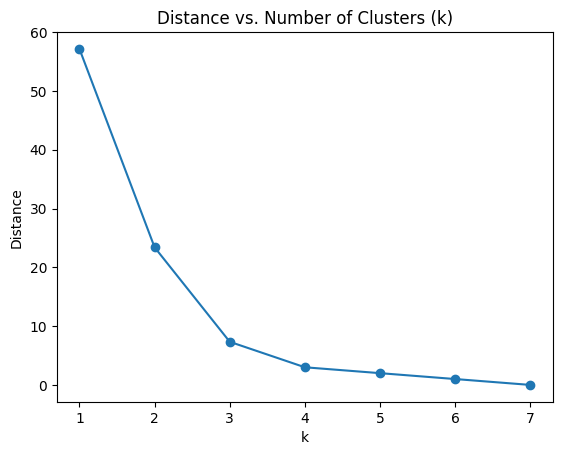

[57.14285714285714, 23.4, 7.333333333333333, 3.0, 2.0, 1.0, 0.0]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = np.array([[2,4], [1,5], [5,2], [6,3], [4,4], [7,7], [6,8]])
ks = range(1, 8) # k = 1..7 (since we have 7 samples)
distances = []
for k in ks:
    km = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=0)
    km.fit(X)
    distances.append(km.inertia_)
plt.plot(ks, distances, marker='o')
plt.xticks(ks)
plt.title('Distance vs. Number of Clusters (k)')
plt.xlabel('k')
plt.ylabel('Distance')
plt.show()

print(distances)
# [57.14285714285714, 23.4, 7.333333333333333, 3.0, 2.0, 1.0, 0.0]

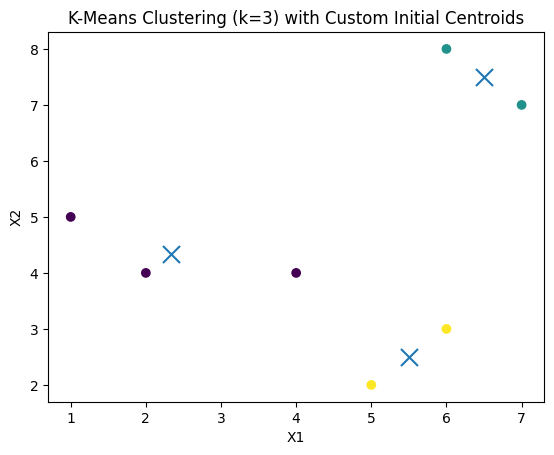

7.333333333333333


In [14]:
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[2,4], [1,5], [5,2], [6,3], [4,4], [7,7], [6,8]])

# Define the exact starting centroids
initial_centroids = np.array([
    [2,4],   # centroid 1
    [6,8],   # centroid 2
    [5,2]    # centroid 3
])

# Fit model
km = KMeans(n_clusters=3, init=initial_centroids, n_init=1, random_state=0)
km.fit(X)
labels = km.labels_
centers = km.cluster_centers_

# Plot clusters
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)  # colored by cluster label (default colormap)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=150)  # plot centroids
plt.title("K-Means Clustering (k=3) with Custom Initial Centroids")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

print(km.inertia_)
